# Session 2: Perceptron, Artificial Neural Networks and Deep Learning

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 1: Coding the perceptron

In [2]:
# Define the activation function (Step function)
def step_activation_function(x):
    return 1 if x >= 0 else 0

In [3]:
# Defining the Sigmoid activation function
def Sigmoid(x):
    return 1 / (1+np.exp(-x))

In [4]:
Sigmoid(0)

0.5

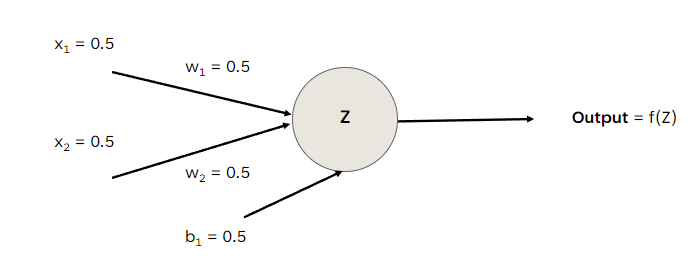

In [9]:
# Compute the output of the perceptron above:
Z = w1*x1 + w2*x2 + b

'\n    Your code goes here\n'

In [5]:
Z = 0.5*0.5 + 0.5*0.5 + 0.5
print(Sigmoid(Z))

0.7310585786300049


In [10]:
# Now, let's change the activation function to ReLU
'''
    1. Define the ReLU activation function
    2. Recompute the output of the perceptron
'''

'\n    1. Define the ReLU activation function\n    2. Recompute the output of the perceptron\n'

## Exercise 2: Coding the logic gates using the perceptron

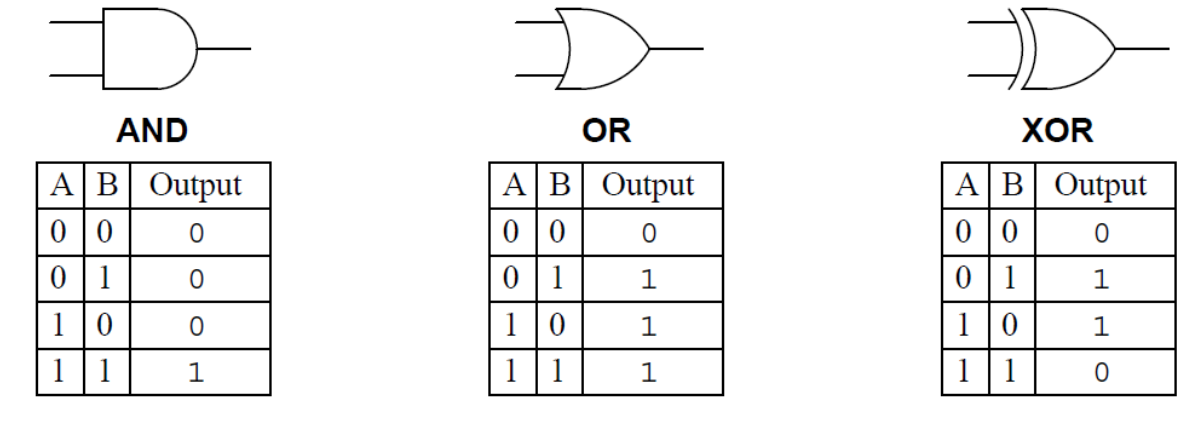

In [6]:
# Coding the "OR" logic gate

# Define the activation function (Step function)
def activation_function(x):
    return 1 if x >= 0 else 0

In [7]:
# Define the perceptron function
def perceptron(input_data, weights, bias):
    weighted_sum = np.dot(input_data, weights) + bias
    return activation_function(weighted_sum)

In [8]:
# Define the OR gate truth table
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([0, 1, 1, 1])

In [10]:
weight = np.array([1,1])
bias = -0.5

In [11]:
for i in range(len(input_data)):
    print("X1 = ", input_data[i,0], " OR X2 = ", input_data[i,1], "==>", perceptron(input_data[i], weight, bias))

X1 =  0  OR X2 =  0 ==> 0
X1 =  0  OR X2 =  1 ==> 1
X1 =  1  OR X2 =  0 ==> 1
X1 =  1  OR X2 =  1 ==> 1


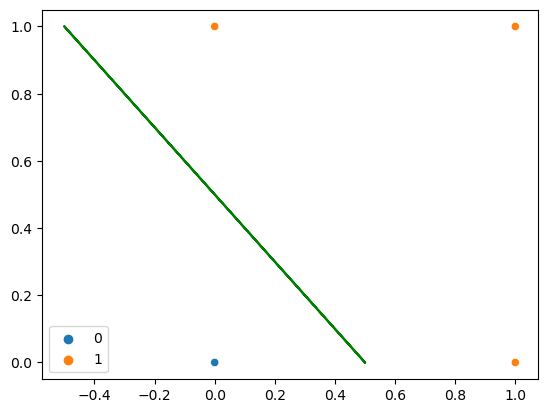

In [48]:
## Plotting the decision boundary for OR Logic Gate
X1 = (-bias - weight[1] * input_data[:,1]) / weight[0]
sns.scatterplot(x = input_data[:,0], y = input_data[:,1], hue = target_output)
plt.plot(X1, input_data[:,1], color = 'green')

In [12]:
# Coding the AND logic gate
# Define the AND gate truth table
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([0, 0, 0, 1])

In [13]:
weight = np.array([1,1])
bias = -1.5

In [14]:
for i in range(len(input_data)):
    print("X1 = ", input_data[i,0], " and X2 = ", input_data[i,1], "==>", perceptron(input_data[i], weight, bias))

X1 =  0  and X2 =  0 ==> 0
X1 =  0  and X2 =  1 ==> 0
X1 =  1  and X2 =  0 ==> 0
X1 =  1  and X2 =  1 ==> 1


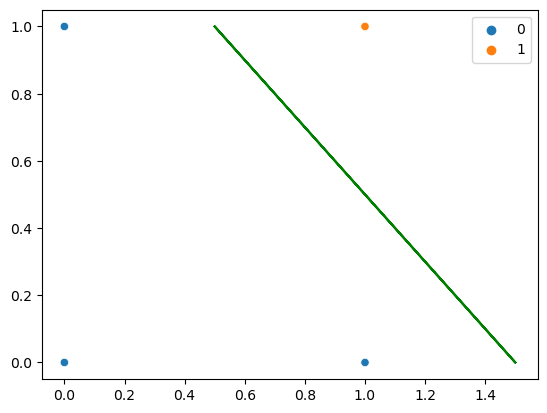

In [15]:
## Plotting the decision boundary for OR Logic Gate
X1 = (-bias - weight[1] * input_data[:,1]) / weight[0]
sns.scatterplot(x = input_data[:,0], y = input_data[:,1], hue = target_output)
plt.plot(X1, input_data[:,1], color = 'green')

In [55]:
## XOR and Perceptron Problem
# Define the XOR gate truth table
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([0, 1, 1, 0])

<AxesSubplot:>

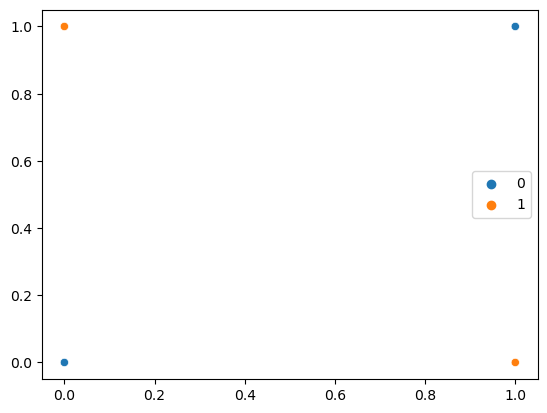

In [56]:
sns.scatterplot(x = input_data[:,0], y = input_data[:,1], hue = target_output)

<b>Note 1: </b>The XOR problem is a classic problem in artificial intelligence and machine learning that illustrates the limitations of single-layer perceptrons and the power of multi-layer perceptrons. By using a neural network with at least one hidden layer, it is possible to model complex, non-linear functions like XOR.
<br>
<b>Note 2: </b> A perceptron can only converge on linearly separable data. Therefore, it isn't capable of imitating the XOR function.

## Artificial Neural Networks

### Building a Simple Neural Network From Scratch

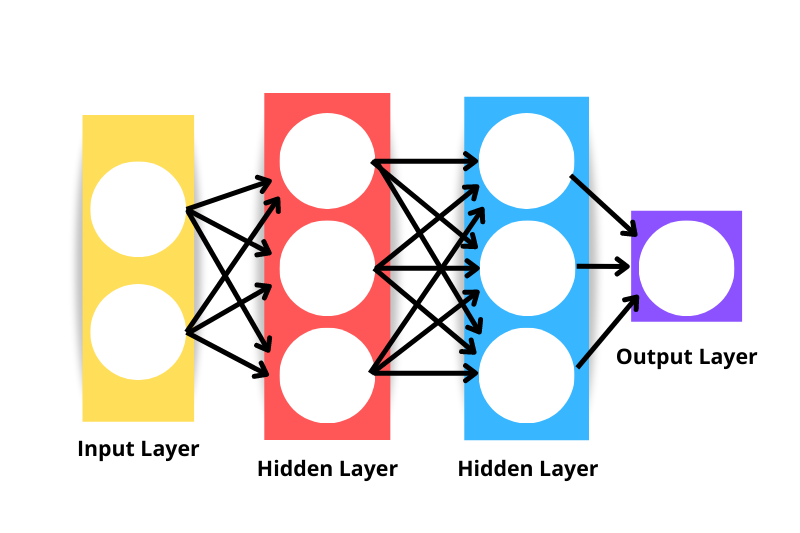

<b>How do neural networks work?</b>
<ol>
    <li>
        <b>Weight initialization:</b> It is the first component in the neural network architecture. The initial weights we set to define the start point for the optimization process of the neural network model. 
        <ul>
            <li>Zero initialization</li>
            <li>Random initialization</li>
        </ul>
    </li>
    <li>
        <b>Forward propagation: </b>Neural networks work by taking a weighted average plus a bias term and applying an activation function to add a non-linear transformation. In the weighted average formulation, each weight determines the importance of each feature (i.e., how much it contributes to predicting the output).
        <br>
        Z = (w1.x1 + w2.x2 + w3.x3 + ... + wn.xn) + b
        <br>
        If the formula looks familiar, that’s because it is linear regression. Without introducing non-linearity into the neurons, we would have linear regression, which is a simple model. The non-linear transformation allows our neural network to learn complex patterns. 
    </li>
    <li>
        <b>Activation function: </b> Sigmoid, Tanh, ReLU, Softmax ...etc 
    </li>
    <li>
        <b>Backpropagation: </b>At the end of the first forward pass, the network makes predictions using the initialized weights, which are not tuned. Thus, it’s highly likely that the predictions the model makes will not be accurate. Using the loss calculated from forward propagation, we pass information back through the network to fine-tune the weights in a process known as backpropagation. 
    </li>
</ol>

In [51]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize random seed for reproducibility
np.random.seed(0)

# Define the dataset (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
input_nodes = 2
hidden_nodes = 4
output_nodes = 1

W1 = np.random.uniform(size=(input_nodes, hidden_nodes))
b1 = np.random.uniform(size=(1, hidden_nodes))

W2 = np.random.uniform(size=(hidden_nodes, output_nodes))
b2 = np.random.uniform(size=(1, output_nodes))

# Hyperparameters
learning_rate = 0.5
epochs = 10000

# Training loop
for _ in range(epochs):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Calculate loss
    error = y - a2

    # Backpropagation
    d2 = error * sigmoid_derivative(a2)
    d1 = np.dot(d2, W2.T) * sigmoid_derivative(a1)

    # Update weights and biases
    W2 += learning_rate * np.dot(a1.T, d2)
    b2 += learning_rate * np.sum(d2, axis=0, keepdims=True)
    W1 += learning_rate * np.dot(X.T, d1)
    b1 += learning_rate * np.sum(d1, axis=0, keepdims=True)

# Testing the trained model
predictions = sigmoid(np.dot(sigmoid(np.dot(X, W1) + b1), W2) + b2)

print("Predictions:")
print(predictions)

Predictions:
[[0.01742485]
 [0.9847399 ]
 [0.98492404]
 [0.01514081]]


## Multi-Layer Perceptron (MLP) using sklearn

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $ f(.):\mathbb{R}^{m} → \mathbb{R}^{o}$
 by training on a dataset, where ***m*** 
 is the number of dimensions for input and ***o***
 is the number of dimensions for output. Given a set of features $X=x_1,x_2, …, x_M$
 and a target $y$
, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure below shows a one hidden layer MLP with scalar output.

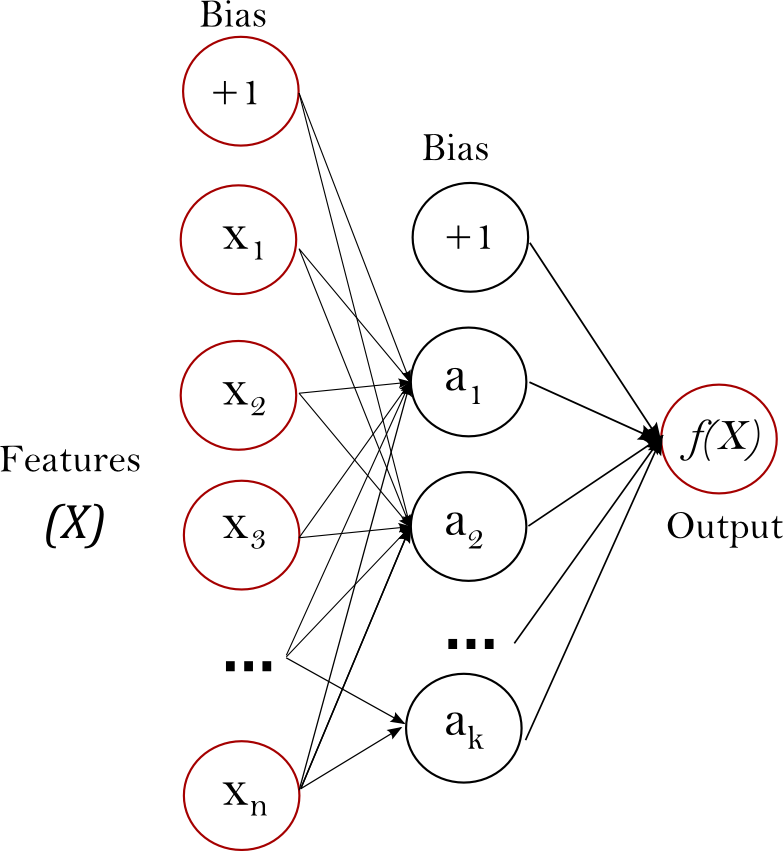

In [11]:
# Example using skLearn library
# Inporting libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
#Reading the Data and Performing Basic Data Checks of the diabetese dataset
df = pd.read_csv('../Datasets/diabetes.csv') 
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
# Defining the features (X) and the target (y)
target_column = ['Outcome'] 
features = list(set(list(df.columns)) - set(target_column))

In [5]:
# Creating the Training and Test sets

X = df[features].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [10]:
# Building, Predicting, and Evaluating the Neural Network Model

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (8,8,8), activation='relu', solver='sgd', max_iter=500)
mlp.fit(X_train,y_train)

predictions = mlp.predict(X_test)

C:\Users\jairiidriss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

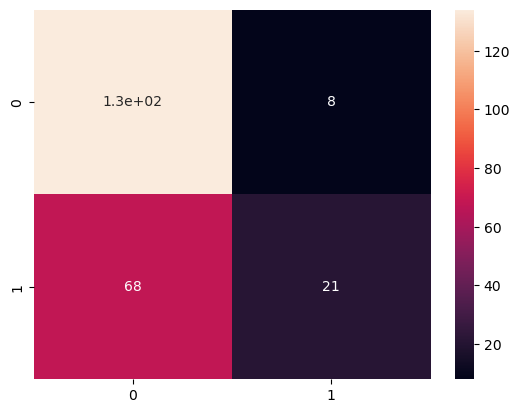

In [14]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       142
           1       0.72      0.24      0.36        89

    accuracy                           0.67       231
   macro avg       0.69      0.59      0.57       231
weighted avg       0.69      0.67      0.62       231



In [21]:
mlp.coefs_

[array([[-0.12773582,  0.47459952, -0.56167998, -0.3482195 ,  0.53405634,
          0.30214511,  0.05203179, -0.05660587],
        [ 0.13930164, -0.47846217, -0.37515193,  0.21959532, -0.21039893,
          0.21388141, -0.34999496, -0.10758486],
        [-0.3857348 ,  0.39491285,  0.52801376,  0.1437279 ,  0.28155618,
         -0.15413591, -0.4675903 , -0.07719125],
        [ 0.07320154, -0.31126468,  0.59615879,  0.26983111, -0.26417165,
          0.17616047, -0.35761318,  0.31003732],
        [-0.43838371, -0.30721364, -0.57237199,  0.07622215, -0.10814524,
         -0.50140873,  0.18978204, -0.13436857],
        [-0.20196522, -0.27190881,  0.03196587,  0.11191427, -0.22081158,
         -0.4886882 ,  0.46799647,  0.54702737],
        [ 0.37345792,  0.37346538,  0.03368093, -0.23690123,  0.33664637,
         -0.43369078,  0.37311262,  0.1279461 ],
        [-0.14379165,  0.001668  , -0.27488677,  0.16015714,  0.03818854,
          0.38495537, -0.14152504, -0.01041892]]),
 array([[-0.34

## Multi-Layer Perceptron using TensorFlow

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
TF_model = Sequential()
TF_model.add( Dense(4, activation = "relu", input_shape = (3,)) )
TF_model.add( Dense(4, activation = "relu") )
TF_model.add( Dense(1, activation = "sigmoid") )

In [28]:
TF_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## Building a Neural Network for MNIST datset (Handwritten digits recognition)

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [21]:
## Importing Dataset
mnist = tf.keras.datasets.mnist.load_data()

In [23]:
# Checking the size/shape of the MNIST dataset
len(mnist), len(mnist[0]), len(mnist[1]), len(mnist[0][0]), len(mnist[0][1]), len(mnist[1][0]), len(mnist[1][1])

(2, 2, 2, 60000, 60000, 10000, 10000)

As we can see the mnist dataset contains two sets of hand-written digits (0 to 9), the first one is the train test which contains 60000 training example with their labels (y_train). On the other hand, the 10000 samples refer to the testing set

In [25]:
(X_train, y_train), (X_test, y_test) = mnist
print("Total training examples: ",len(X_train))
print("Total testing examples: ",len(X_test))

Total training examples:  60000
Total testing examples:  10000


In [26]:
X_train[0].shape

(28, 28)

Each training example in the training set is representing a 28 by 28 matrix, each cell contains a value between 0 and 255 representing the grayscale level for each cell/pixel, 0 for black and 255 for white

In [27]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

This is number  5


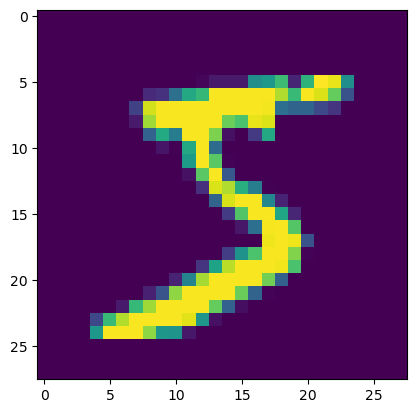

In [28]:
# Let's visualize this as an image
plt.imshow(X_train[0])
print("This is number ", y_train[0])

This is number  9


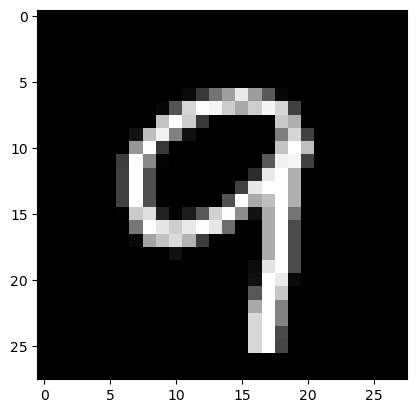

In [29]:
# Another example
plt.imshow(X_train[322], cmap = plt.cm.gray)
print("This is number ", y_train[322])

In [30]:
## Building the ANN model
# At this stage we tend to build a model that can be able to classify digits images
# Let's create and initialize the model 
'''
    A way of creating deep learning models where an instance of the Sequential class is created and 
    model layers are created and added to it
'''
model = tf.keras.models.Sequential()

In [31]:
# We then add the input layer, the hidden layer(s), and the output layer to the initialized model
'''
    As we have seen, each training example is a 28 by 28 matrix, and because we are going to use ANN and not CNN, 
    I am going to reshape the input data as a single array that contains 28*28 = 784 elements
'''
# Adding the input layer
model.add(tf.keras.layers.Flatten())
# Adding the first hidden layer that contains 256 neurons
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
# Adding the second hidden layer that contains 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Adding the output layer that contains 10 output neurons, each of them representing the probability of getting a digit [0-9]
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [32]:
# Compiling the model, selecting the optimization algorithm to be used to train the model and the metrics to be tracked
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

Epoch 1/20
1125/1125 [==============================] - 7s 7ms/step - loss: 0.0510 - accuracy: 0.9916 - val_loss: 0.3786 - val_accuracy: 0.9752
Epoch 2/20
1125/1125 [==============================] - 7s 6ms/step - loss: 0.0566 - accuracy: 0.9896 - val_loss: 0.4064 - val_accuracy: 0.9767
Epoch 3/20
1125/1125 [==============================] - 7s 6ms/step - loss: 0.0360 - accuracy: 0.9923 - val_loss: 0.5223 - val_accuracy: 0.9768
Epoch 4/20
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0395 - accuracy: 0.9924 - val_loss: 0.3558 - val_accuracy: 0.9797
Epoch 5/20
1125/1125 [==============================] - 7s 6ms/step - loss: 0.0435 - accuracy: 0.9924 - val_loss: 0.4167 - val_accuracy: 0.9776
Epoch 6/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.0490 - accuracy: 0.9921 - val_loss: 0.4815 - val_accuracy: 0.9722
Epoch 7/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.0553 - accuracy: 0.9917 - val_loss: 0.3911 - val_accuracy:

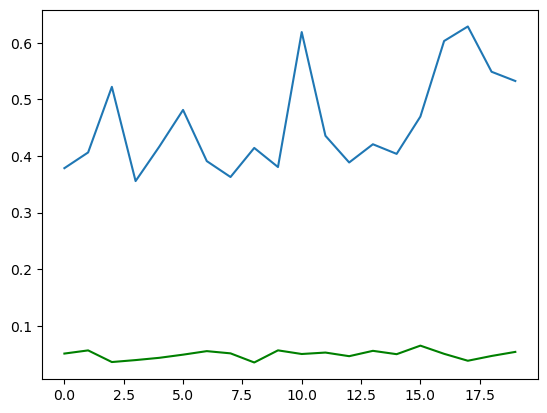

In [43]:
# Fitting the data to the ANN model
history_ = model.fit(X_train, y_train, epochs = 20, validation_split = 0.4)
plt.plot(history_.history['loss'], label = "Training set", color = 'green')
plt.plot(history_.history['val_loss'], label = "Validation set")
plt.show()

In [44]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


<AxesSubplot:>

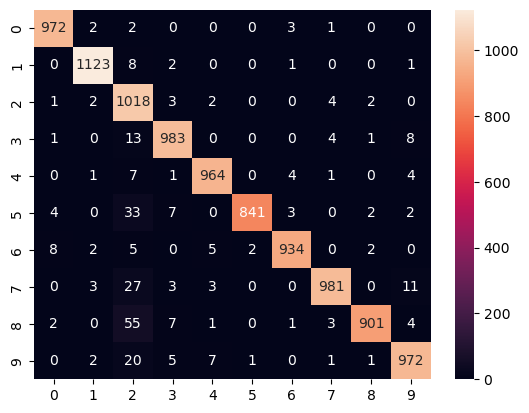

In [45]:
# Let's plot the confusion matrix
predictions = [np.argmax(x) for x in predictions]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')